In [17]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [19]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [20]:
x_train = x_train/255
x_test = x_test/255

In [21]:
def plot_digit(image,digit,plt,i):
    plt.subplot(4,5,i+1)
    plt.imshow(image,cmap='gray')
    plt.xticks([])
    plt.yticks([])

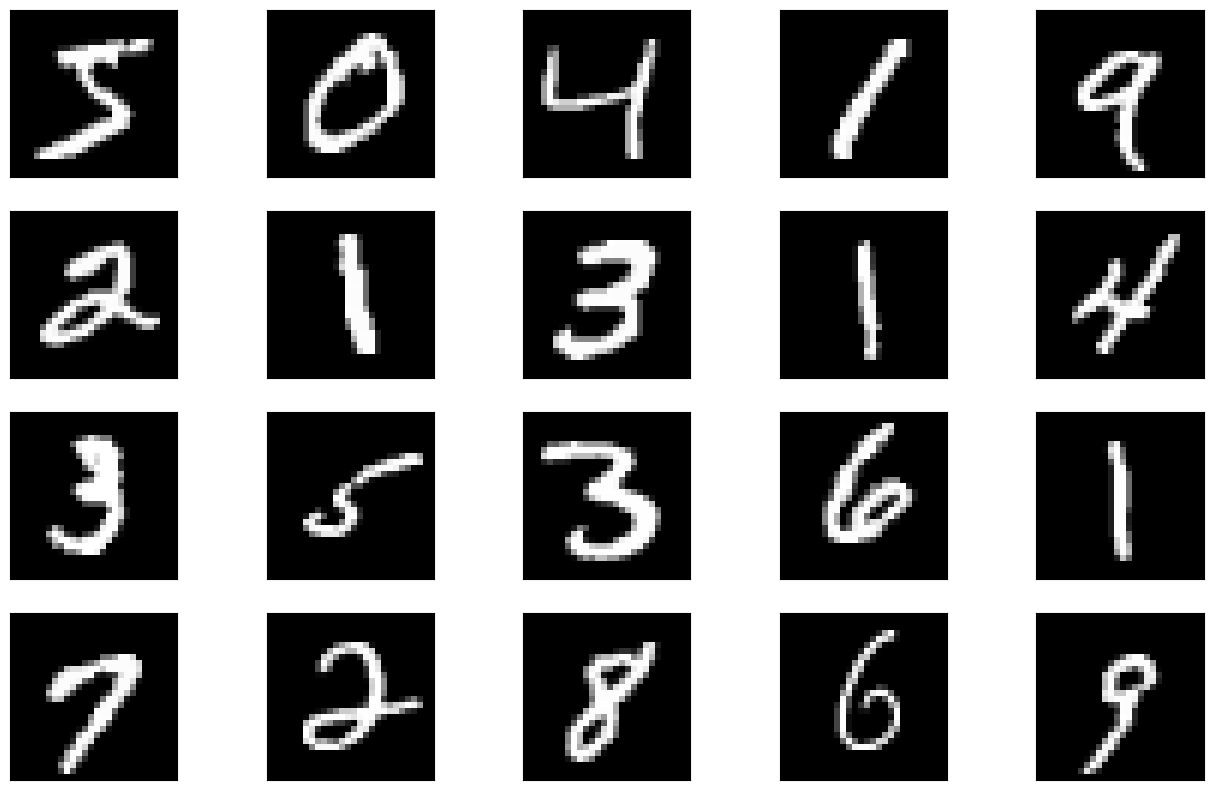

In [22]:
plt.figure(figsize=(16,10))
for i in range(20):
    plot_digit(x_train[i],y_train[i],plt,i)
plt.show()

In [23]:
x_train = x_train.reshape((x_train.shape + (1,)))
x_test = x_test.reshape((x_test.shape + (1,)))
y_train[0:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [24]:
model = Sequential([Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)),MaxPooling2D((2,2)),Flatten(),Dense(100,activation="relu"),Dense(10,activation="softmax")])

In [25]:
optimizer = SGD(learning_rate=0.01,momentum=0.9)
model.compile(optimizer=optimizer,loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542230 (2.07 MB)
Trainable params: 542230 (2.07 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

Epoch 1/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2396 - accuracy: 0.9265
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0759 - accuracy: 0.9769
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0492 - accuracy: 0.9850
Epoch 4/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0366 - accuracy: 0.9889
Epoch 5/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0267 - accuracy: 0.9916
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0199 - accuracy: 0.9938
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0150 - accuracy: 0.9955
Epoch 8/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0111 - accuracy: 0.9968
Epoch 9/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0084 - accuracy: 0.9978
Epoch 10/10
1/1 [==============================] - 0s 25ms/step


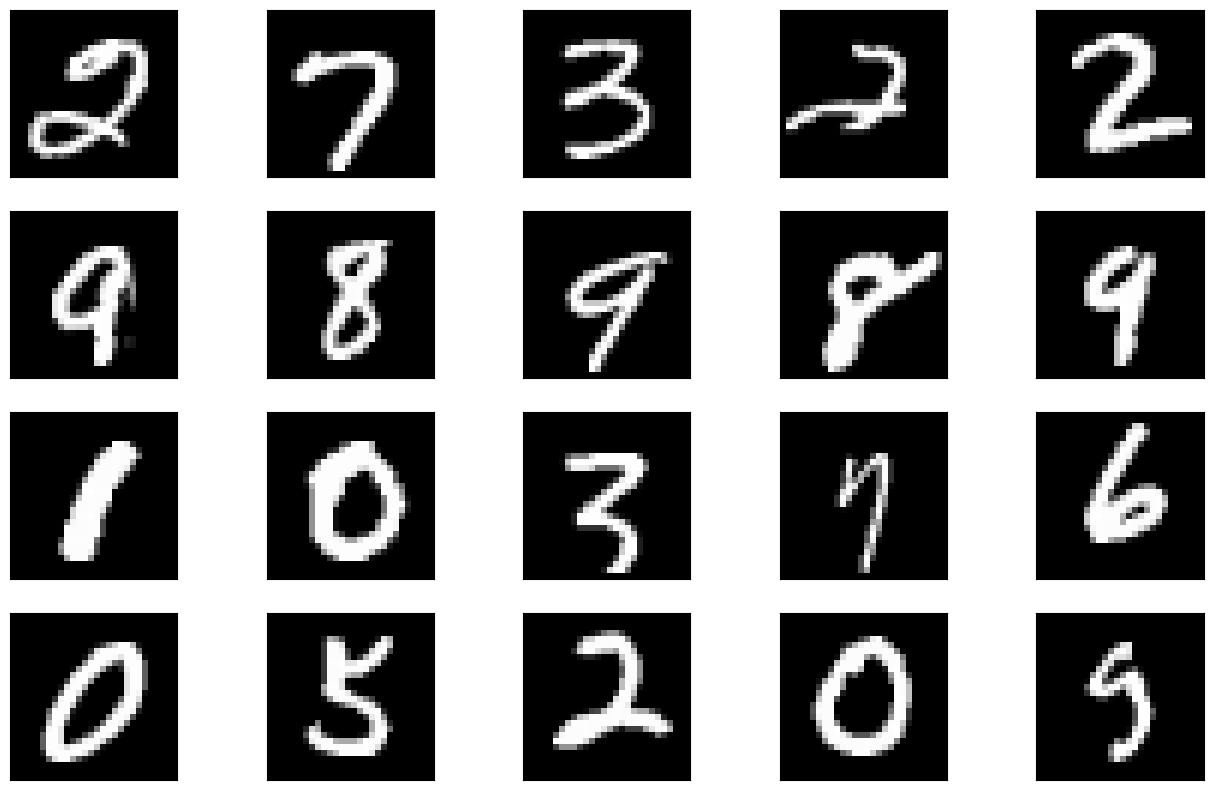

In [27]:
model.fit(x_train,y_train,epochs=10,batch_size=32)
plt.figure(figsize=(16,10))
for i in range(20):
    image = random.choice(x_test).squeeze()
    digit = np.argmax(model.predict(image.reshape((1,28,28,1)))[0],axis=-1)
    plot_digit(image,digit,plt,i)
plt.show()

In [28]:
predictions = np.argmax(model.predict(x_test),axis=-1)

313/313 [==============================] - 1s 2ms/step


In [29]:
accuracy_score(y_test,predictions)

0.9871

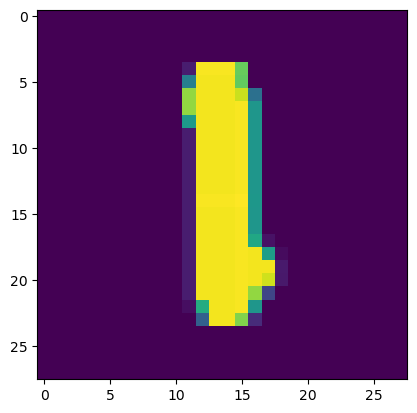

In [30]:
n = random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

In [31]:
predicted_value = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [32]:
print("Handwritten number in the image is:",np.argmax(predicted_value[n]))

Handwritten number in the image is: 1


In [33]:
score = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0445 - accuracy: 0.9871


In [34]:
print("Loss: ",score[0])
print("Accuracy",score[1])

Loss:  0.04453291743993759
Accuracy 0.9871000051498413
